In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import scipy.stats as st
import statsmodels.api as sm 
import pylab as py 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [16]:


df = pd.read_csv('https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/ames2.csv')


df_encoded = pd.get_dummies(df, columns=['MSSubClass'], drop_first=True)


for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)


X = df_encoded.drop(columns=['logSalePrice'])
y = df_encoded['logSalePrice']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())
RSME = np.sqrt(model.mse_resid)
print(f"Root Mean Squared Error (RSME): {RSME:.4f}")

                            OLS Regression Results                            
Dep. Variable:           logSalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     233.7
Date:                Thu, 05 Feb 2026   Prob (F-statistic):               0.00
Time:                        16:25:28   Log-Likelihood:                 525.75
No. Observations:                1000   AIC:                            -991.5
Df Residuals:                     970   BIC:                            -844.3
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             15.1326      7.144      2.

In [8]:
r = X.corr()
print(r)


                const   LotArea  GrLivArea  OverallQual  FullBath  \
const             NaN       NaN        NaN          NaN       NaN   
LotArea           NaN  1.000000   0.271826     0.124242  0.155140   
GrLivArea         NaN  0.271826   1.000000     0.610830  0.639111   
OverallQual       NaN  0.124242   0.610830     1.000000  0.579177   
FullBath          NaN  0.155140   0.639111     0.579177  1.000000   
TotalPorchSF      NaN  0.089529   0.255120     0.174789  0.083149   
BsmtFinSF1        NaN  0.174474   0.136687     0.215519  0.080169   
GaragedCat        NaN -0.130252  -0.103092    -0.246449 -0.213392   
TotRmsAbvGrd      NaN  0.190936   0.842012     0.461186  0.542785   
TotalBsmtSF       NaN  0.235157   0.403473     0.539971  0.340306   
YearBuilt         NaN  0.036196   0.220854     0.557037  0.505925   
YrSold            NaN -0.023266   0.016548    -0.005187  0.046511   
BsmtUnfSF         NaN  0.030978   0.242545     0.311923  0.266291   
GarageArea        NaN  0.202571   

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]  
print(vif_data[1:len(X.columns)])

           feature       VIF
1          LotArea  1.230067
2        GrLivArea  7.107334
3      OverallQual  3.054825
4         FullBath  2.484355
5     TotalPorchSF  1.245982
6       BsmtFinSF1  8.186563
7       GaragedCat  1.449169
8     TotRmsAbvGrd  4.110122
9      TotalBsmtSF  8.978022
10       YearBuilt  5.665622
11          YrSold  1.043822
12       BsmtUnfSF  8.304316
13      GarageArea  1.980849
14          MoSold  1.056522
15    PavedDrive01  1.318536
16   MSSubClass_30  1.686728
17   MSSubClass_40  1.048998
18   MSSubClass_45  1.105003
19   MSSubClass_50  2.044296
20   MSSubClass_60  2.966291
21   MSSubClass_70  2.081446
22   MSSubClass_75  1.471770
23   MSSubClass_80  1.159541
24   MSSubClass_85  1.065360
25   MSSubClass_90  1.323402
26  MSSubClass_120  1.269143
27  MSSubClass_160  1.428845
28  MSSubClass_180  1.060279
29  MSSubClass_190  1.189941


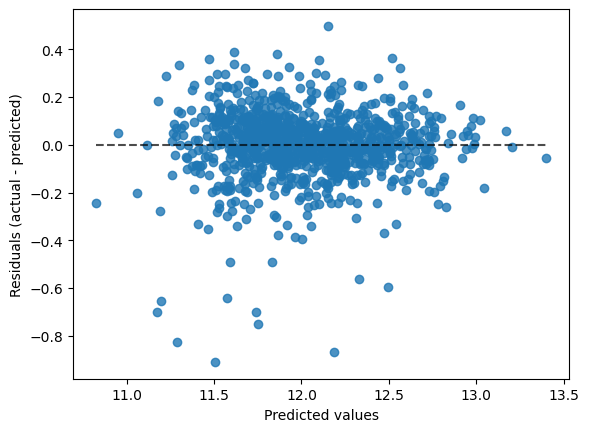

In [17]:
y_hat = model.predict(X)
display = PredictionErrorDisplay.from_predictions(y, model.fittedvalues)
plt.show()